# Classification des données Iris par Keras

## Environnement

In [1]:
from pandas import read_csv
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

## Les données

### Import

In [2]:
data = read_csv("/home/noura/Projets/Keras_Iris/Datas/iris.data", 
                names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'species'])

### Exploration

In [3]:
data

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
data.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Vérifier que les données soient réelles

In [6]:
output_verif = data.applymap(np.isreal).all(0)
output_verif

sepal length     True
sepal width      True
petal length     True
petal width      True
species         False
dtype: bool

In [7]:
data.shape # vérification des dimensions

(150, 5)

### Visualisation par espèce

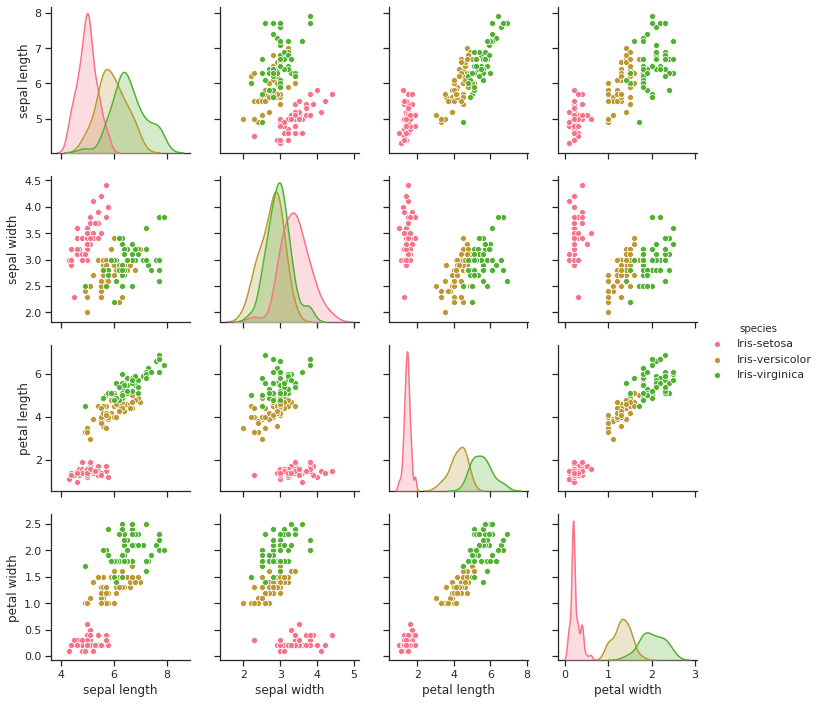

In [8]:
sns.set(style = "ticks")
sns.set_palette("husl")
sns.pairplot(data.iloc[:,0:5], hue="species")

## Mise en place du modele

### Préparation des données

In [9]:
import tensorflow as tf
from tensorflow import keras

In [10]:
#Définition de X : attention X est un numpy
X = data[['sepal length', 'sepal width', 'petal length', 'petal width']].to_numpy()
X.shape

(150, 4)

In [11]:
#Définition de Y
Y = data[['species']]
Y.shape

(150, 1)

In [12]:
#Il faut à présent trier les Y par catégorie
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.utils import np_utils

In [14]:
encoder = LabelEncoder()
Y_encod = encoder.fit_transform(Y) #les espèces sont encodées en integer

In [15]:
Y_onehot = np_utils.to_categorical(Y_encod) #Y est trié selon les catégories càd selon les 3 sorties attendues

In [16]:
Y_onehot.shape

(150, 3)

In [17]:
Y_onehot[:6,:]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

### Le modèle

In [18]:
from keras.models import Sequential
from keras.layers import Dense
from keras import Input, Model

In [34]:
#choix d'un modèle séquentiel
model = Sequential()
#1ère couche dense composée de 10 neuronnes pour les 4 inputs (mesures métriques). La fonction est sigmoïde
model.add(Dense(10, input_dim=4, activation="sigmoid"))
#2eme et 3éme couches denses : idem 1ère en diminuant le nombre de neuronnes (pas besoin de préciser les inputs)
model.add(Dense(8, activation="sigmoid"))
model.add(Dense(6, activation="sigmoid"))
#dernière couche dense : le nbre de neuronnes doit correspondre aux nombres de catégories (species)
model.add(Dense(3, activation="sigmoid"))

In [35]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_8 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 21        
Total params: 213
Trainable params: 213
Non-trainable params: 0
_________________________________________________________________
None


## Compilations et résultats

### Sur le jeux de données complet

In [36]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#Il y a plus de 2 ouput, on choisit donc une focntion loss de type categorical_crossentropy

In [37]:
history = model.fit(X, Y_onehot, epochs=150, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/150
14/14 [==============================] - 0s 8ms/step - loss: 1.1955 - accuracy: 0.3704 - val_loss: 0.9078 - val_accuracy: 0.0000e+00
Epoch 2/150
14/14 [==============================] - 0s 2ms/step - loss: 1.1814 - accuracy: 0.3704 - val_loss: 0.9305 - val_accuracy: 0.0000e+00
Epoch 3/150
14/14 [==============================] - 0s 2ms/step - loss: 1.1673 - accuracy: 0.3704 - val_loss: 0.9505 - val_accuracy: 0.0000e+00
Epoch 4/150
14/14 [==============================] - 0s 2ms/step - loss: 1.1558 - accuracy: 0.3704 - val_loss: 0.9691 - val_accuracy: 0.0000e+00
Epoch 5/150
14/14 [==============================] - 0s 2ms/step - loss: 1.1447 - accuracy: 0.3704 - val_loss: 0.9856 - val_accuracy: 0.0000e+00
Epoch 6/150
14/14 [==============================] - 0s 2ms/step - loss: 1.1360 - accuracy: 0.3704 - val_loss: 1.0054 - val_accuracy: 0.0000e+00
Epoch 7/150
14/14 [==============================] - 0s 2ms/step - loss: 1.1267 - accuracy: 0.3704 - val_loss: 1.0270 - val_accura

14/14 [==============================] - 0s 2ms/step - loss: 0.6247 - accuracy: 0.7407 - val_loss: 0.9714 - val_accuracy: 0.0000e+00
Epoch 58/150
14/14 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.7407 - val_loss: 0.9675 - val_accuracy: 0.0000e+00
Epoch 59/150
14/14 [==============================] - 0s 2ms/step - loss: 0.6100 - accuracy: 0.7407 - val_loss: 0.9653 - val_accuracy: 0.0000e+00
Epoch 60/150
14/14 [==============================] - 0s 3ms/step - loss: 0.6032 - accuracy: 0.7407 - val_loss: 0.9637 - val_accuracy: 0.0000e+00
Epoch 61/150
14/14 [==============================] - 0s 2ms/step - loss: 0.5968 - accuracy: 0.7407 - val_loss: 0.9620 - val_accuracy: 0.0000e+00
Epoch 62/150
14/14 [==============================] - 0s 2ms/step - loss: 0.5906 - accuracy: 0.7407 - val_loss: 0.9599 - val_accuracy: 0.0000e+00
Epoch 63/150
14/14 [==============================] - 0s 2ms/step - loss: 0.5845 - accuracy: 0.7407 - val_loss: 0.9538 - val_accuracy: 0.

14/14 [==============================] - 0s 2ms/step - loss: 0.4130 - accuracy: 0.7407 - val_loss: 0.9004 - val_accuracy: 0.0000e+00
Epoch 114/150
14/14 [==============================] - 0s 2ms/step - loss: 0.4099 - accuracy: 0.7407 - val_loss: 0.8982 - val_accuracy: 0.0000e+00
Epoch 115/150
14/14 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.7407 - val_loss: 0.8851 - val_accuracy: 0.0000e+00
Epoch 116/150
14/14 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.7407 - val_loss: 0.8961 - val_accuracy: 0.0000e+00
Epoch 117/150
14/14 [==============================] - 0s 2ms/step - loss: 0.3995 - accuracy: 0.7407 - val_loss: 0.8733 - val_accuracy: 0.0000e+00
Epoch 118/150
14/14 [==============================] - 0s 2ms/step - loss: 0.3970 - accuracy: 0.7407 - val_loss: 0.8737 - val_accuracy: 0.0000e+00
Epoch 119/150
14/14 [==============================] - 0s 2ms/step - loss: 0.3929 - accuracy: 0.7407 - val_loss: 0.8607 - val_accura

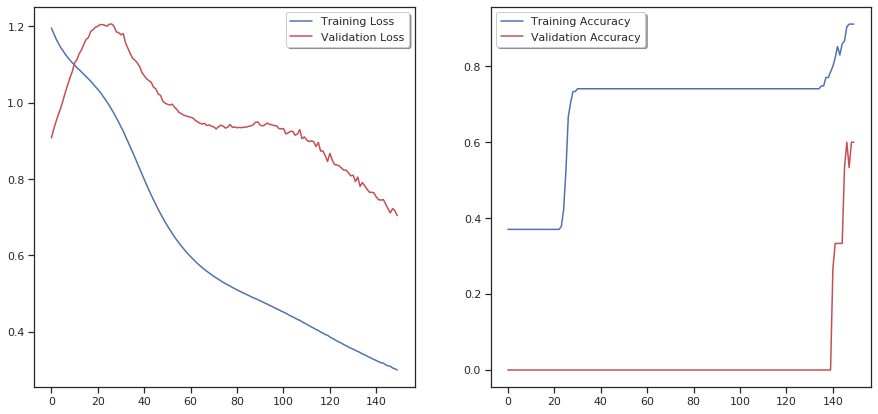

In [38]:
#Représentation graphiques des performances du modèle
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [39]:
#Evaluation
eval = model.evaluate(X,Y_onehot)

5/5 [==============================] - 0s 813us/step - loss: 0.3392 - accuracy: 0.8800


In [40]:
print("Accuracy: %.1f" % (eval[1]*100))
print("Loss: %.1f" % (eval[0]*100))

Accuracy: 88.0
Loss: 33.9


In [41]:
#Prédiction
prediction = model.predict(X)
for i in range(20):
    print(prediction[i])

[0.5640843  0.0309158  0.00336638]
[0.55731785 0.03134638 0.00339827]
[0.5611633  0.03110191 0.00338003]
[0.5551996  0.03148192 0.00340813]
[0.5646713  0.03087863 0.00336358]
[0.56073564 0.03112829 0.00338182]
[0.5590978  0.03123376 0.00338957]
[0.5612534  0.03109571 0.00337958]
[0.5529071  0.03162903 0.0034191 ]
[0.559361   0.031216   0.00338855]
[0.5653354  0.03083608 0.00336051]
[0.55861396 0.03126383 0.00339198]
[0.5594967  0.03120762 0.00338796]
[0.56270725 0.03100428 0.00337288]
[0.5703016  0.03052148 0.00333765]
[0.5679954  0.03066769 0.00334808]
[0.5661868  0.03078249 0.00335655]
[0.56225455 0.03103217 0.00337481]
[0.5627481  0.0309999  0.00337255]
[0.5637214  0.03093895 0.00336793]


### Séparer le jeux de données : Apprentissage et validation

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y_onehot, test_size = 0.2, random_state=0)

In [44]:
model = Sequential()
model.add(Dense(10,input_shape=(4,),activation='sigmoid'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(6,activation='sigmoid'))
model.add(Dense(3,activation='softmax'))

In [45]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
#Apprentissage du même modèle sur les nouvelles données d'apprentissage
history = model.fit(X_train, Y_train, epochs=200, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/200
11/11 [==============================] - 0s 10ms/step - loss: 1.1148 - accuracy: 0.3889 - val_loss: 1.2533 - val_accuracy: 0.1667
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1075 - accuracy: 0.3889 - val_loss: 1.2330 - val_accuracy: 0.1667
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.1017 - accuracy: 0.3889 - val_loss: 1.2169 - val_accuracy: 0.1667
Epoch 4/200
11/11 [==============================] - 0s 3ms/step - loss: 1.0963 - accuracy: 0.3889 - val_loss: 1.2022 - val_accuracy: 0.1667
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0923 - accuracy: 0.3889 - val_loss: 1.1903 - val_accuracy: 0.1667
Epoch 6/200
11/11 [==============================] - 0s 3ms/step - loss: 1.0896 - accuracy: 0.3889 - val_loss: 1.1785 - val_accuracy: 0.1667
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 1.0863 - accuracy: 0.3889 - val_loss: 1.1723 - val_accuracy: 0.1667
Epoch 8/200


Epoch 59/200
11/11 [==============================] - 0s 3ms/step - loss: 0.7523 - accuracy: 0.7037 - val_loss: 0.7986 - val_accuracy: 0.5833
Epoch 60/200
11/11 [==============================] - 0s 3ms/step - loss: 0.7421 - accuracy: 0.7037 - val_loss: 0.7869 - val_accuracy: 0.5833
Epoch 61/200
11/11 [==============================] - 0s 3ms/step - loss: 0.7323 - accuracy: 0.7037 - val_loss: 0.7761 - val_accuracy: 0.5833
Epoch 62/200
11/11 [==============================] - 0s 3ms/step - loss: 0.7229 - accuracy: 0.7037 - val_loss: 0.7663 - val_accuracy: 0.5833
Epoch 63/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7139 - accuracy: 0.7037 - val_loss: 0.7576 - val_accuracy: 0.5833
Epoch 64/200
11/11 [==============================] - 0s 2ms/step - loss: 0.7049 - accuracy: 0.7037 - val_loss: 0.7485 - val_accuracy: 0.5833
Epoch 65/200
11/11 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.7037 - val_loss: 0.7363 - val_accuracy: 0.5833
Epoch 

11/11 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.9259 - val_loss: 0.4567 - val_accuracy: 0.8333
Epoch 117/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.9352 - val_loss: 0.4557 - val_accuracy: 0.8333
Epoch 118/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4375 - accuracy: 0.9167 - val_loss: 0.4540 - val_accuracy: 0.8333
Epoch 119/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4332 - accuracy: 0.9352 - val_loss: 0.4477 - val_accuracy: 0.8333
Epoch 120/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.9352 - val_loss: 0.4448 - val_accuracy: 0.8333
Epoch 121/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4255 - accuracy: 0.9352 - val_loss: 0.4381 - val_accuracy: 0.8333
Epoch 122/200
11/11 [==============================] - 0s 2ms/step - loss: 0.4218 - accuracy: 0.9444 - val_loss: 0.4352 - val_accuracy: 0.8333
Epoch 123/200

11/11 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.9630 - val_loss: 0.2658 - val_accuracy: 0.9167
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2461 - accuracy: 0.9630 - val_loss: 0.2644 - val_accuracy: 0.9167
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2432 - accuracy: 0.9630 - val_loss: 0.2608 - val_accuracy: 0.9167
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2405 - accuracy: 0.9722 - val_loss: 0.2544 - val_accuracy: 0.9167
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2379 - accuracy: 0.9722 - val_loss: 0.2578 - val_accuracy: 0.9167
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2370 - accuracy: 0.9630 - val_loss: 0.2620 - val_accuracy: 0.9167
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 0.2326 - accuracy: 0.9630 - val_loss: 0.2460 - val_accuracy: 0.9167
Epoch 180/200

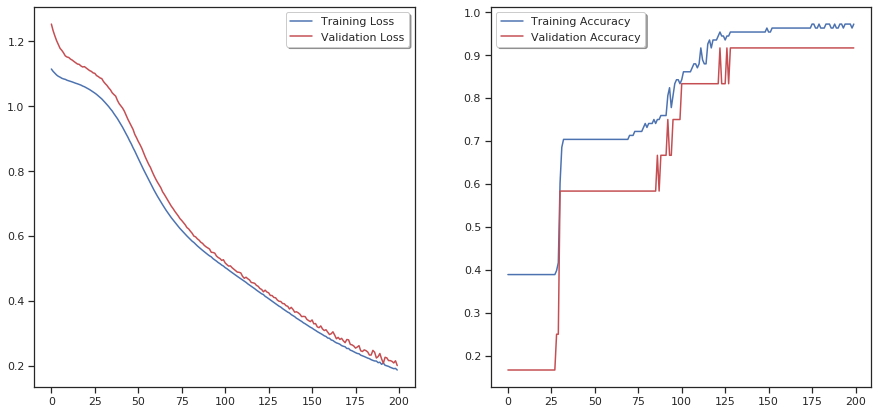

In [47]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [50]:
evaluation = model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 836us/step - loss: 0.1700 - accuracy: 1.0000


In [51]:
print("Accuracy: %.1f" % (evaluation[1]*100))
print("Loss: %.1f" % (evaluation[0]*100))

Accuracy: 100.0
Loss: 17.0


In [52]:
model = Sequential()
model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='tanh'))
model.add(Dense(6,activation='tanh'))
model.add(Dense(3,activation='softmax'))

In [53]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [54]:
history = model.fit(X_train, Y_train, epochs=200, batch_size=10,verbose=1, validation_split=0.1)

Epoch 1/200
11/11 [==============================] - 0s 10ms/step - loss: 1.1086 - accuracy: 0.3148 - val_loss: 1.0698 - val_accuracy: 0.4167
Epoch 2/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0694 - accuracy: 0.3796 - val_loss: 1.0548 - val_accuracy: 0.5833
Epoch 3/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0421 - accuracy: 0.7037 - val_loss: 1.0393 - val_accuracy: 0.5833
Epoch 4/200
11/11 [==============================] - 0s 2ms/step - loss: 1.0198 - accuracy: 0.7037 - val_loss: 1.0235 - val_accuracy: 0.5833
Epoch 5/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9924 - accuracy: 0.7037 - val_loss: 0.9979 - val_accuracy: 0.5833
Epoch 6/200
11/11 [==============================] - 0s 2ms/step - loss: 0.9588 - accuracy: 0.7037 - val_loss: 0.9619 - val_accuracy: 0.5833
Epoch 7/200
11/11 [==============================] - 0s 3ms/step - loss: 0.9188 - accuracy: 0.7037 - val_loss: 0.9220 - val_accuracy: 0.5833
Epoch 8/200


Epoch 59/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1862 - accuracy: 0.9630 - val_loss: 0.2188 - val_accuracy: 0.9167
Epoch 60/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1836 - accuracy: 0.9630 - val_loss: 0.1820 - val_accuracy: 0.9167
Epoch 61/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1819 - accuracy: 0.9537 - val_loss: 0.2140 - val_accuracy: 0.9167
Epoch 62/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1745 - accuracy: 0.9630 - val_loss: 0.1904 - val_accuracy: 0.9167
Epoch 63/200
11/11 [==============================] - 0s 3ms/step - loss: 0.1697 - accuracy: 0.9722 - val_loss: 0.1879 - val_accuracy: 0.9167
Epoch 64/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1648 - accuracy: 0.9630 - val_loss: 0.2036 - val_accuracy: 0.9167
Epoch 65/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.9722 - val_loss: 0.1912 - val_accuracy: 0.9167
Epoch 

11/11 [==============================] - 0s 2ms/step - loss: 0.0865 - accuracy: 0.9815 - val_loss: 0.1401 - val_accuracy: 0.9167
Epoch 117/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0855 - accuracy: 0.9907 - val_loss: 0.1326 - val_accuracy: 0.9167
Epoch 118/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9815 - val_loss: 0.1445 - val_accuracy: 0.9167
Epoch 119/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9815 - val_loss: 0.1356 - val_accuracy: 0.9167
Epoch 120/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0844 - accuracy: 0.9907 - val_loss: 0.1320 - val_accuracy: 0.9167
Epoch 121/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9722 - val_loss: 0.1614 - val_accuracy: 0.9167
Epoch 122/200
11/11 [==============================] - 0s 2ms/step - loss: 0.1026 - accuracy: 0.9630 - val_loss: 0.1284 - val_accuracy: 0.9167
Epoch 123/200

11/11 [==============================] - 0s 2ms/step - loss: 0.0668 - accuracy: 0.9907 - val_loss: 0.1249 - val_accuracy: 0.9167
Epoch 174/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9907 - val_loss: 0.1307 - val_accuracy: 0.9167
Epoch 175/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9907 - val_loss: 0.1260 - val_accuracy: 0.9167
Epoch 176/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0658 - accuracy: 0.9907 - val_loss: 0.1427 - val_accuracy: 0.9167
Epoch 177/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0689 - accuracy: 0.9815 - val_loss: 0.1529 - val_accuracy: 0.9167
Epoch 178/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0621 - accuracy: 0.9907 - val_loss: 0.0964 - val_accuracy: 0.9167
Epoch 179/200
11/11 [==============================] - 0s 2ms/step - loss: 0.0674 - accuracy: 0.9815 - val_loss: 0.1472 - val_accuracy: 0.9167
Epoch 180/200

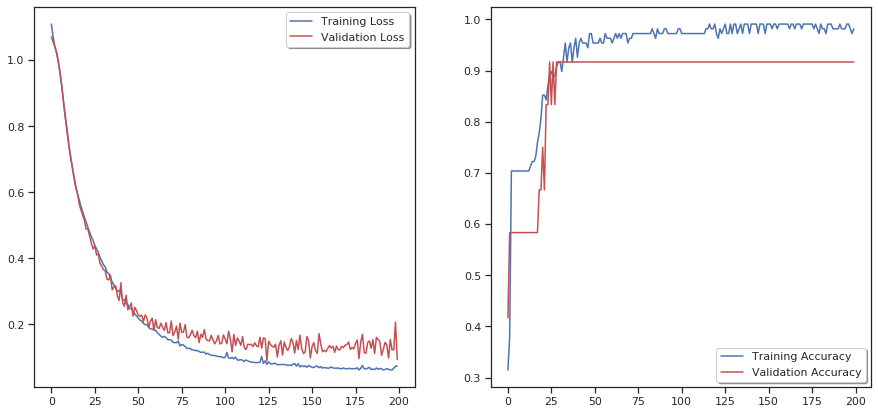

In [55]:
plt.figure(figsize=(15,7))
ax1 = plt.subplot(1,2,1)
ax1.plot(history.history['loss'], color='b', label='Training Loss') 
ax1.plot(history.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
legend = ax1.legend(loc='best', shadow=True)
ax2 = plt.subplot(1,2,2)
ax2.plot(history.history['accuracy'], color='b', label='Training Accuracy') 
ax2.plot(history.history['val_accuracy'], color='r', label = 'Validation Accuracy')
legend = ax2.legend(loc='best', shadow=True)

In [56]:
#Evaluation
evaluation = model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 954us/step - loss: 0.0284 - accuracy: 1.0000


In [57]:
print("Accuracy: %.1f" % (evaluation[1]*100))
print("Loss: %.1f" % (evaluation[0]*100))

Accuracy: 100.0
Loss: 2.8


In [58]:
#Prediction
Y_pred = model.predict(X)
for i in range(20):
    print(Y_pred[i])

[9.9240667e-01 7.4545857e-03 1.3874244e-04]
[9.9217647e-01 7.6832050e-03 1.4027803e-04]
[9.9224722e-01 7.6129651e-03 1.3975403e-04]
[9.9181831e-01 8.0392007e-03 1.4250127e-04]
[9.9236298e-01 7.4980636e-03 1.3896688e-04]
[9.9217743e-01 7.6824944e-03 1.4003356e-04]
[9.9198604e-01 7.8726280e-03 1.4130730e-04]
[9.9222904e-01 7.6311505e-03 1.3981425e-04]
[9.9172908e-01 8.1277387e-03 1.4319533e-04]
[9.9216121e-01 7.6984568e-03 1.4029381e-04]
[9.9247509e-01 7.3865559e-03 1.3831774e-04]
[9.919071e-01 7.951077e-03 1.417897e-04]
[9.9219745e-01 7.6624691e-03 1.4010064e-04]
[9.9226624e-01 7.5940546e-03 1.3965039e-04]
[9.9276477e-01 7.0985770e-03 1.3671712e-04]
[9.9253196e-01 7.3301257e-03 1.3791982e-04]
[9.9256027e-01 7.3018647e-03 1.3784012e-04]
[9.9235630e-01 7.5045945e-03 1.3905967e-04]
[9.9240440e-01 7.4568125e-03 1.3872678e-04]
[9.9227035e-01 7.5901835e-03 1.3947675e-04]


In [59]:
#Table de confusion
from sklearn.metrics import classification_report,confusion_matrix

In [60]:
Y_test_class = np.argmax(Y_onehot,axis=1)
Y_pred_class = np.argmax(Y_pred,axis=1)

In [61]:
Y_test_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [62]:
Y_pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [63]:
print(classification_report(Y_test_class,Y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [64]:
print(confusion_matrix(Y_test_class,Y_pred_class))

[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]
